In [1]:
# !pip install squarify

In [2]:
# !pip install pygal

In [3]:
# !pip install CairoSVG

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pygal 
from pygal.style import Style

In [5]:
toxic_train = pd.read_csv("https://www.dropbox.com/s/8nqzj2glur4xyw1/toxic_train.csv?dl=1")
toxic_test = pd.read_csv("https://www.dropbox.com/s/9wgt22a8vfdf1a5/toxic_test.csv?dl=1")

## EDA

In [6]:
toxic_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [7]:
toxic_test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [8]:
toxic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [9]:
toxic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97320 entries, 0 to 97319
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            97320 non-null  int64 
 1   comment_text  97320 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
# check for null values

toxic_train.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [11]:
# check for null values

toxic_test.isnull().sum()

id              0
comment_text    0
dtype: int64

**Target Feature**

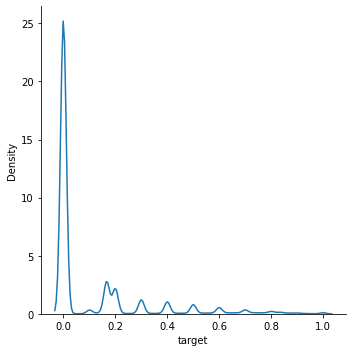

In [12]:
# Plot target feature distribution

sns.displot(toxic_train['target'], kind="kde")
plt.show()

# Most comments are non-toxic (< 0.5)

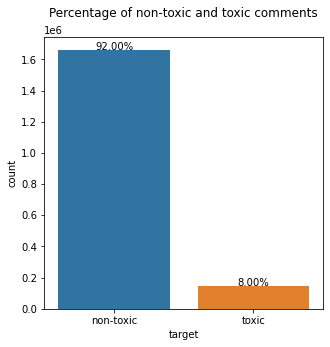

In [13]:
# If toxicity rating < 0.5 then the comment is non-toxic else it is toxic.
# Get toxic and non-toxic comments.
temp = toxic_train['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

# Plot the number and percentage of toxic and non-toxic comments.
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(temp))

# Plot the count plot.
cntplot = sns.countplot(x=temp)
cntplot.set_title('Percentage of non-toxic and toxic comments', pad=20)

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

# dataset appears imbalanced with more non-toxic than toxic (can be dealt by undersampling / oversampling / SMOTE)

**Toxic Comments Per Identity**

In [14]:
identities = ['male','female','transgender','other_gender','heterosexual','homosexual_gay_or_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino','other_race_or_ethnicity',
              'physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness',
              'other_disability']

In [15]:
toxic_labeled_df = toxic_train.loc[:, ['target'] + identities ].dropna()

# if score > 0.5, can consider as toxic

toxic_df = toxic_labeled_df[toxic_labeled_df['target'] >= .5][identities]
non_toxic_df = toxic_labeled_df[toxic_labeled_df['target'] < .5][identities]

In [16]:
# at first, we just want to consider the identity tags in binary format. So if the tag is any value other than 0 we consider it as 1.

toxic_count = toxic_df.where(toxic_labeled_df == 0, other = 1).sum()
non_toxic_count = non_toxic_df.where(toxic_labeled_df == 0, other = 1).sum()

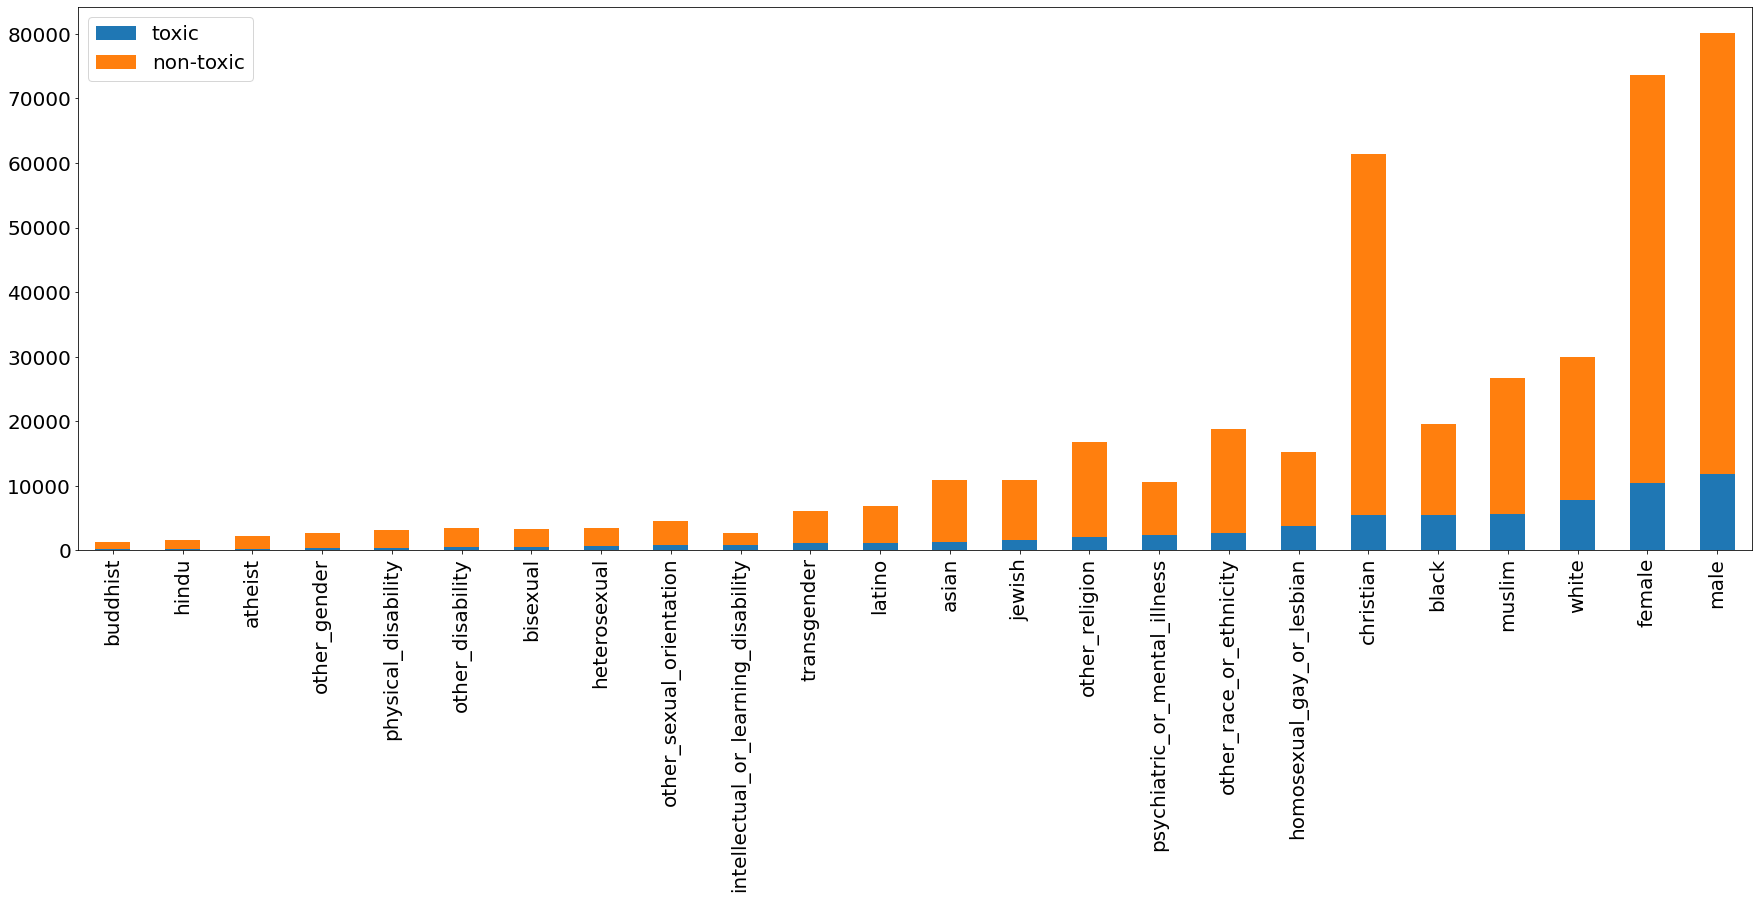

In [17]:
# now we can concat the two series together to get a toxic count vs non toxic count for each identity

toxic_vs_non_toxic = pd.concat([toxic_count, non_toxic_count], axis=1)
toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index=str, columns={1: "non-toxic", 0: "toxic"})
# here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})
plt.show()

**Correlation of Identities
(Identify if comments were about one group or just one identity)**

For Toxic Comments

In [18]:
toxic_df.corr()["male"].sort_values(ascending = False)

male                                   1.000000
female                                 0.251032
white                                  0.093315
heterosexual                           0.079224
homosexual_gay_or_lesbian              0.047570
transgender                            0.032546
black                                  0.022581
bisexual                               0.016136
other_sexual_orientation               0.011243
physical_disability                    0.009453
other_disability                       0.003717
other_gender                          -0.000985
hindu                                 -0.006054
intellectual_or_learning_disability   -0.008745
atheist                               -0.009451
latino                                -0.012586
buddhist                              -0.016511
other_religion                        -0.020685
other_race_or_ethnicity               -0.021788
christian                             -0.024229
psychiatric_or_mental_illness         -0

In [19]:
toxic_df.corr()["homosexual_gay_or_lesbian"].sort_values(ascending = False)

homosexual_gay_or_lesbian              1.000000
heterosexual                           0.234602
bisexual                               0.168542
transgender                            0.130152
other_sexual_orientation               0.111654
christian                              0.096497
other_gender                           0.055825
male                                   0.047570
other_religion                         0.031171
female                                 0.020832
jewish                                 0.016437
atheist                                0.006786
muslim                                 0.006350
hindu                                  0.005961
physical_disability                    0.005284
latino                                 0.003951
buddhist                               0.002545
other_disability                       0.002321
other_race_or_ethnicity               -0.010379
asian                                 -0.019550
intellectual_or_learning_disability   -0

For Non-toxic comments

In [20]:
non_toxic_df.corr()["male"].sort_values(ascending = False)

male                                   1.000000
female                                 0.337290
white                                  0.092776
heterosexual                           0.056103
black                                  0.039830
homosexual_gay_or_lesbian              0.036298
transgender                            0.029125
other_sexual_orientation               0.013915
physical_disability                    0.013626
bisexual                               0.009494
other_disability                       0.009084
other_gender                           0.001246
intellectual_or_learning_disability   -0.001594
buddhist                              -0.003866
latino                                -0.005227
christian                             -0.005297
hindu                                 -0.006675
psychiatric_or_mental_illness         -0.008079
other_race_or_ethnicity               -0.009748
atheist                               -0.010326
other_religion                        -0

In [21]:
non_toxic_df.corr()["homosexual_gay_or_lesbian"].sort_values(ascending = False)

homosexual_gay_or_lesbian              1.000000
bisexual                               0.237183
heterosexual                           0.223105
transgender                            0.131330
other_sexual_orientation               0.109869
christian                              0.066678
other_gender                           0.041458
male                                   0.036298
female                                 0.028639
other_religion                         0.023343
jewish                                 0.017682
black                                  0.015399
muslim                                 0.012675
atheist                                0.008477
latino                                 0.005139
buddhist                               0.004921
other_disability                       0.004827
physical_disability                    0.004636
intellectual_or_learning_disability    0.001164
hindu                                  0.000771
other_race_or_ethnicity               -0

**Word Clouds**

In [ ]:
# !pip install wordcloud

In [22]:
# import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [23]:
stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

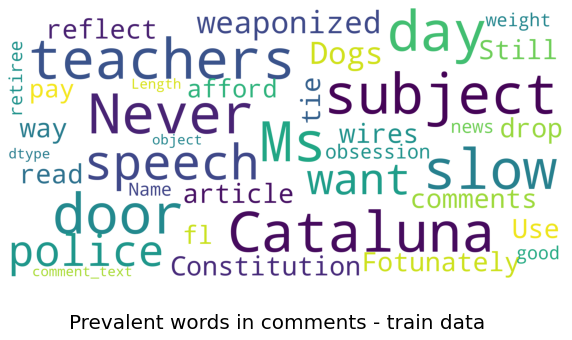

In [24]:
show_wordcloud(toxic_train['comment_text'].sample(20000), title = 'Prevalent words in comments - train data')

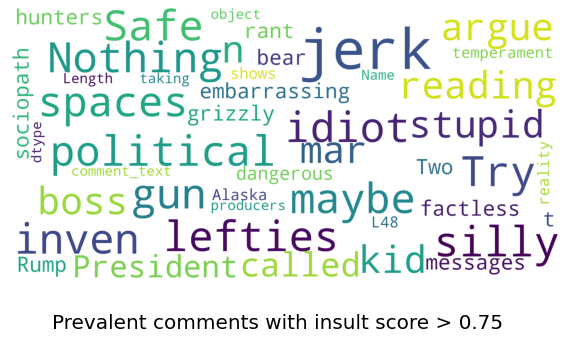

In [25]:
show_wordcloud(toxic_train.loc[toxic_train['insult'] > 0.75]['comment_text'].sample(20000), 
               title = 'Prevalent comments with insult score > 0.75')

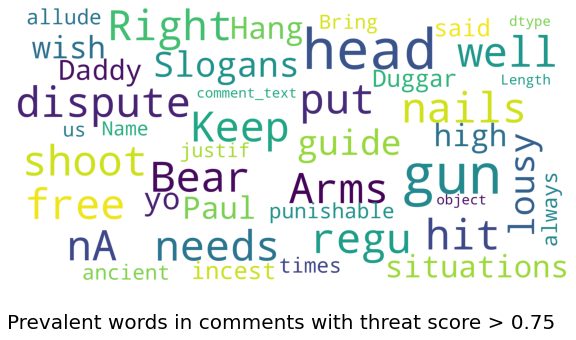

In [26]:
show_wordcloud(toxic_train.loc[toxic_train['threat'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with threat score > 0.75')

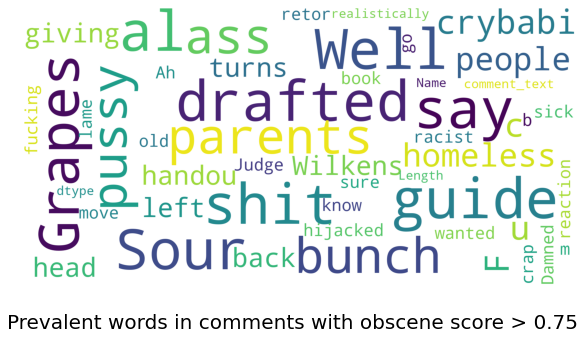

In [27]:
show_wordcloud(toxic_train.loc[toxic_train['obscene'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with obscene score > 0.75')

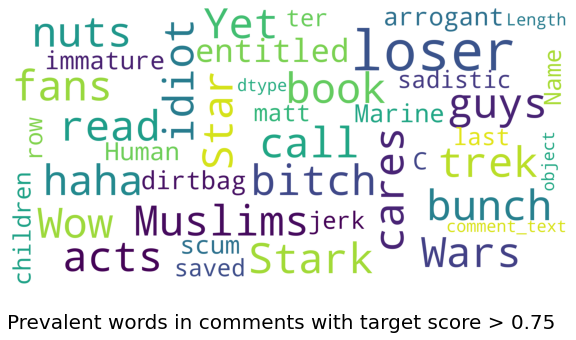

In [28]:
show_wordcloud(toxic_train.loc[toxic_train['target'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with target score > 0.75')

In [29]:
toxic_train.loc[(toxic_train['male'] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()

1153

In [30]:
label= ["male", "female", "transgender","other_gender","heterosexual", "homosexual_gay_or_lesbian","bisexual","other_sexual_orientation"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_gender in label:
    counter1 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_gender] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_gender)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_gender)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_gender)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_gender)
gender_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
gender_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
gender_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
gender_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(gender_data_insult)
print(gender_data_threat)
print(gender_data_obscene)
print(gender_data_target)

                       label  values
0                       male     636
1                     female     681
2                transgender      24
3               heterosexual       4
4  homosexual_gay_or_lesbian     119
5                   bisexual       1
                       label  values
0                       male      21
1                     female      12
2  homosexual_gay_or_lesbian       2
                       label  values
0                       male      53
1                     female      48
2                transgender       2
3  homosexual_gay_or_lesbian       5
                       label  values
0                       male    1153
1                     female    1230
2                transgender      76
3               heterosexual      24
4  homosexual_gay_or_lesbian     495
5                   bisexual       6
6   other_sexual_orientation       1


In [31]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

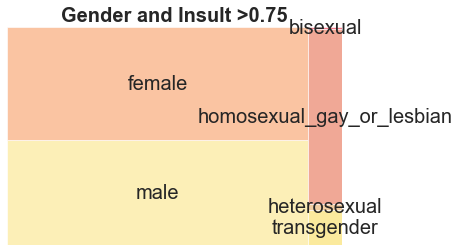

In [32]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_insult["values"].values# proportions of the categories
label=gender_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

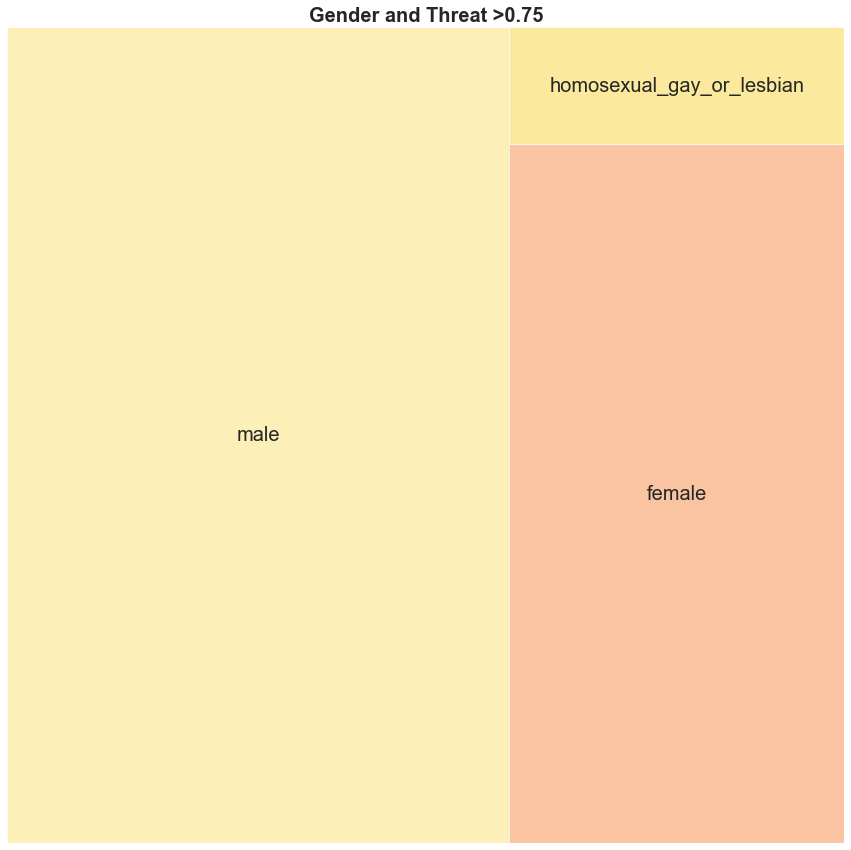

In [33]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_threat["values"].values# proportions of the categories
label=gender_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

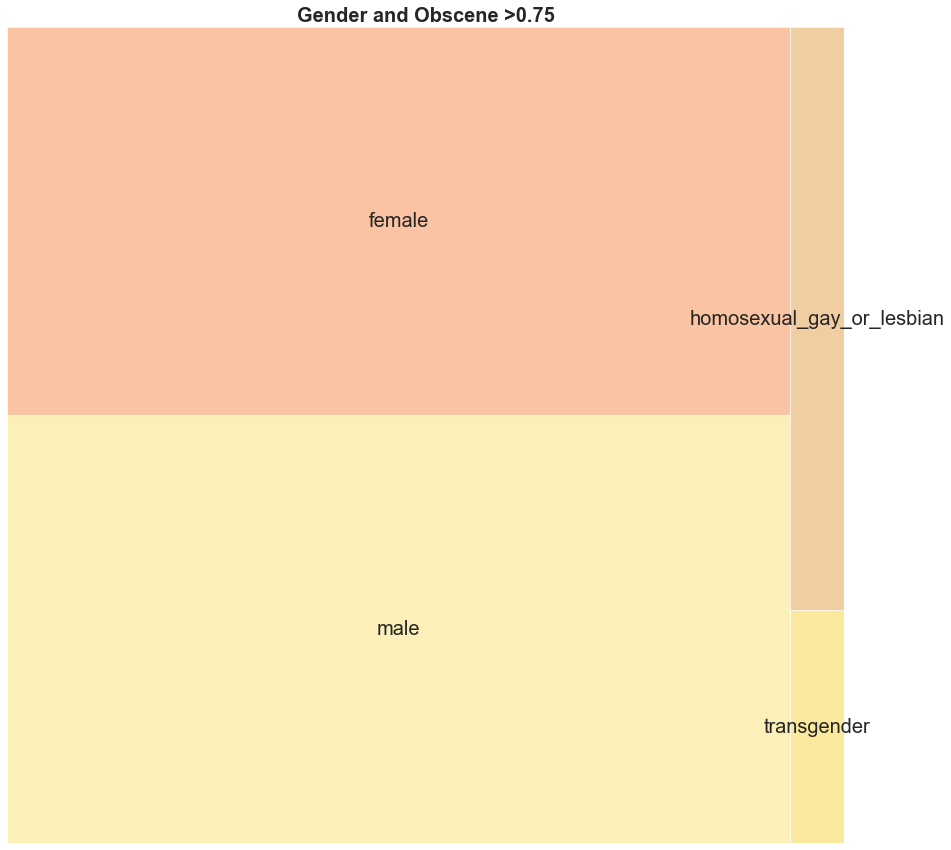

In [34]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_obscene["values"].values# proportions of the categories
label=gender_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})
plt.rcParams["figure.figsize"] = [15,15]
plt.title("Gender and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

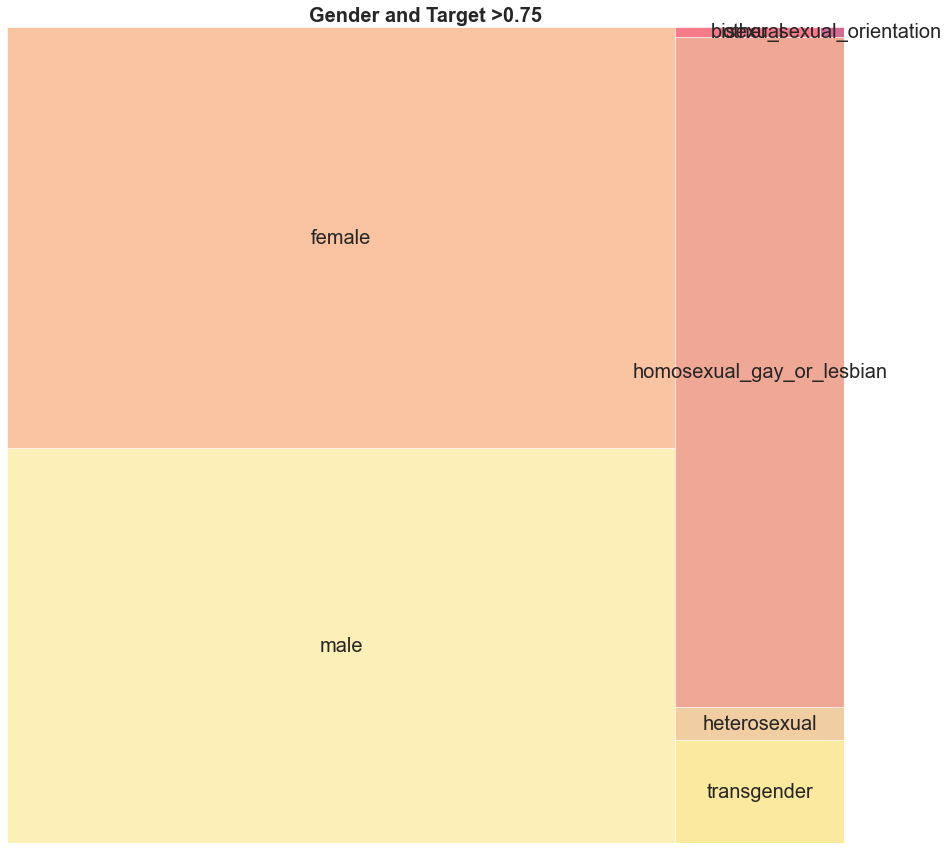

In [35]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= gender_data_target["values"].values# proportions of the categories
label=gender_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [25,25]
plt.title("Gender and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [36]:
label= ["christian", "jewish", "muslim","hindu","atheist", "other_religion"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_religion in label:
    counter1 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_religion] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_religion)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_religion)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_religion)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_religion)
religion_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
religion_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
religion_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
religion_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(religion_data_insult)
print(religion_data_threat)
print(religion_data_obscene)
print(religion_data_target)

            label  values
0       christian     197
1          jewish      74
2          muslim     246
3           hindu       4
4         atheist      13
5  other_religion       4
       label  values
0  christian       4
1     jewish       4
2     muslim      11
            label  values
0       christian      15
1          jewish       7
2          muslim      13
3           hindu       1
4         atheist       2
5  other_religion       1
            label  values
0       christian     453
1          jewish     214
2          muslim     834
3           hindu       7
4         atheist      29
5  other_religion       5


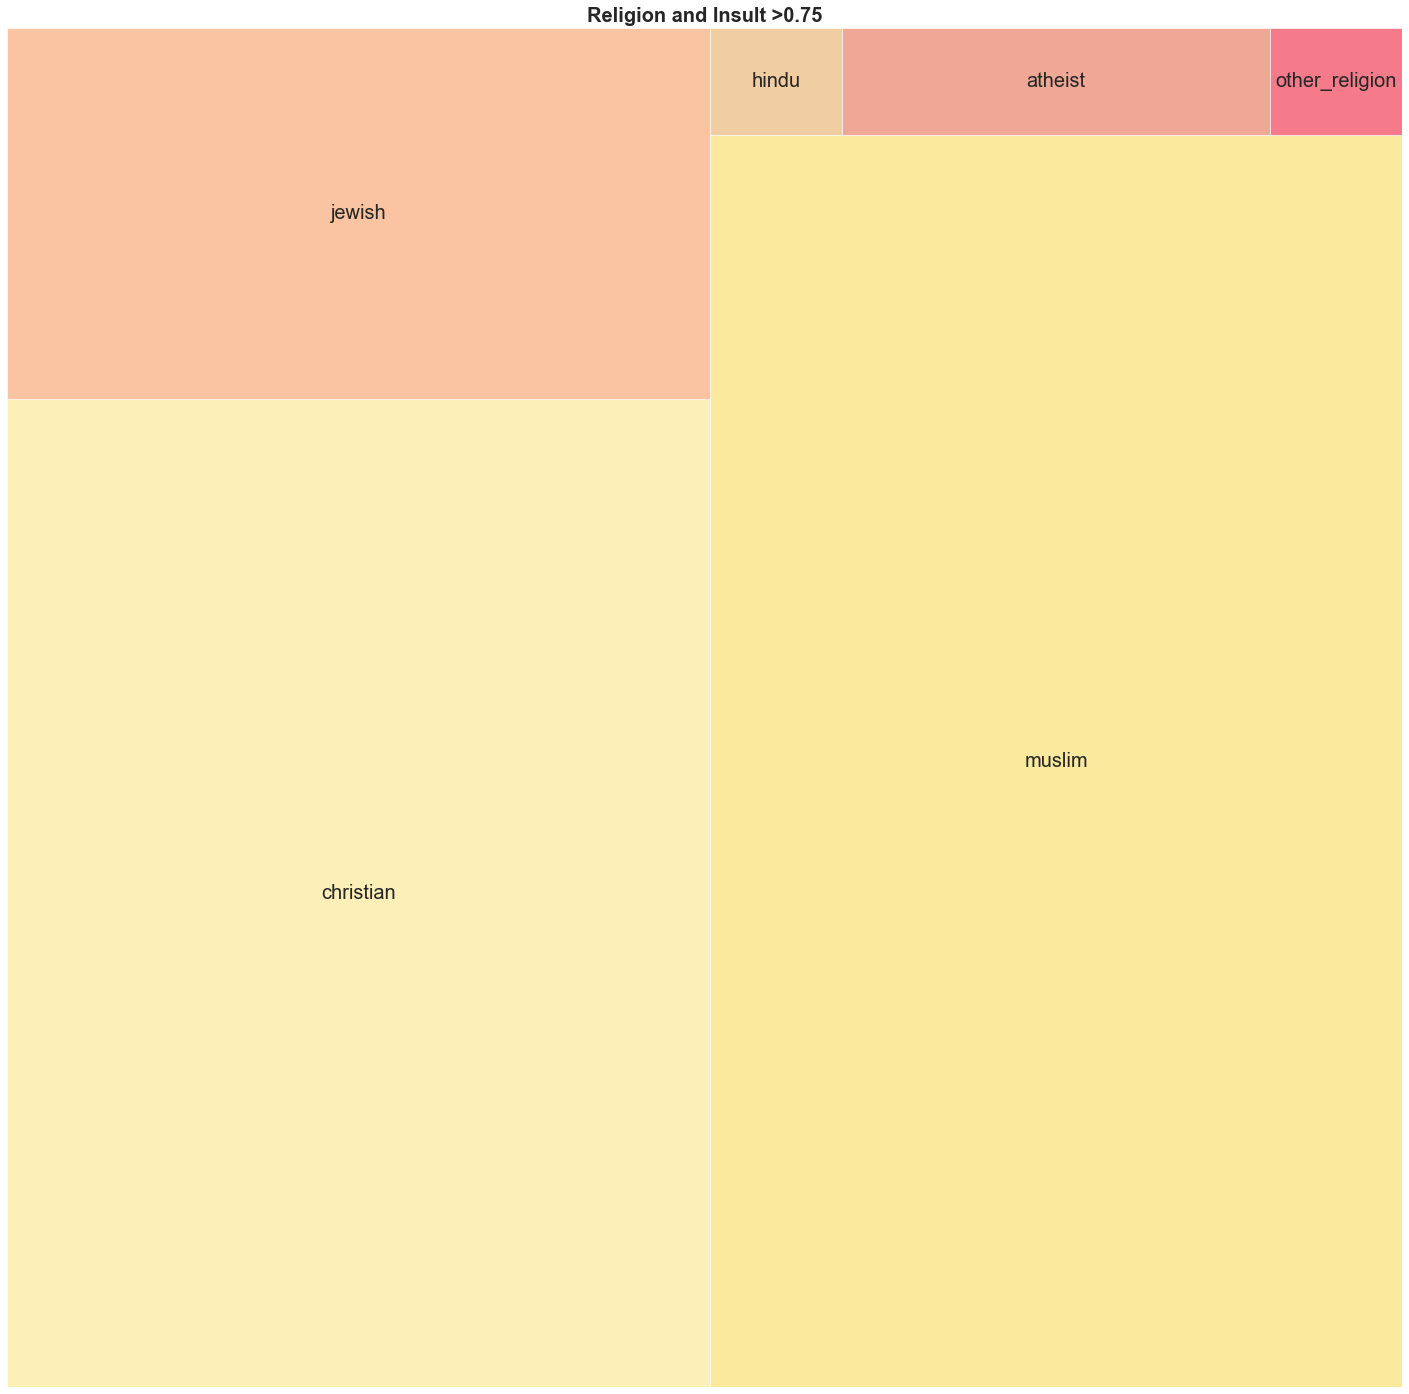

In [37]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_insult["values"].values# proportions of the categories
label=religion_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

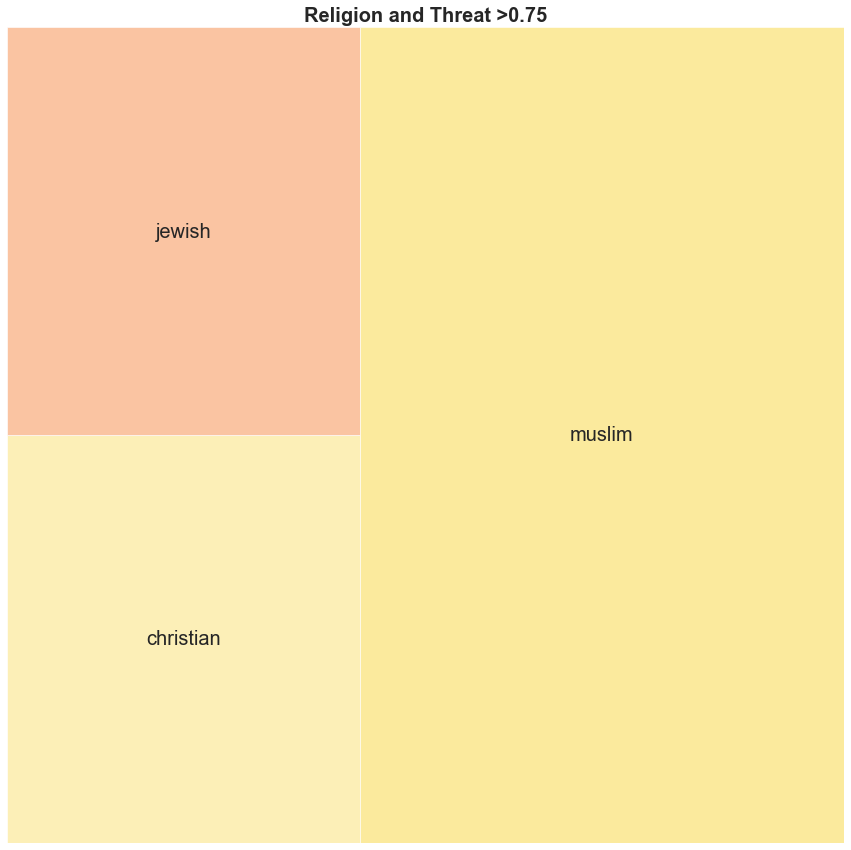

In [38]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_threat["values"].values# proportions of the categories
label=religion_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

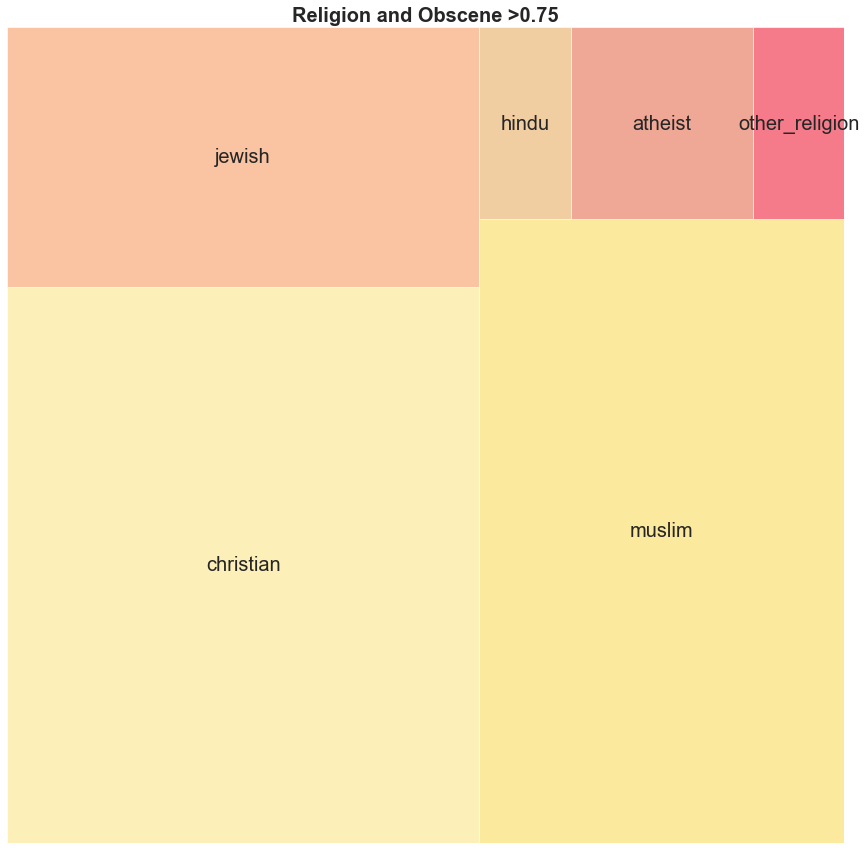

In [39]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_obscene["values"].values# proportions of the categories
label=religion_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

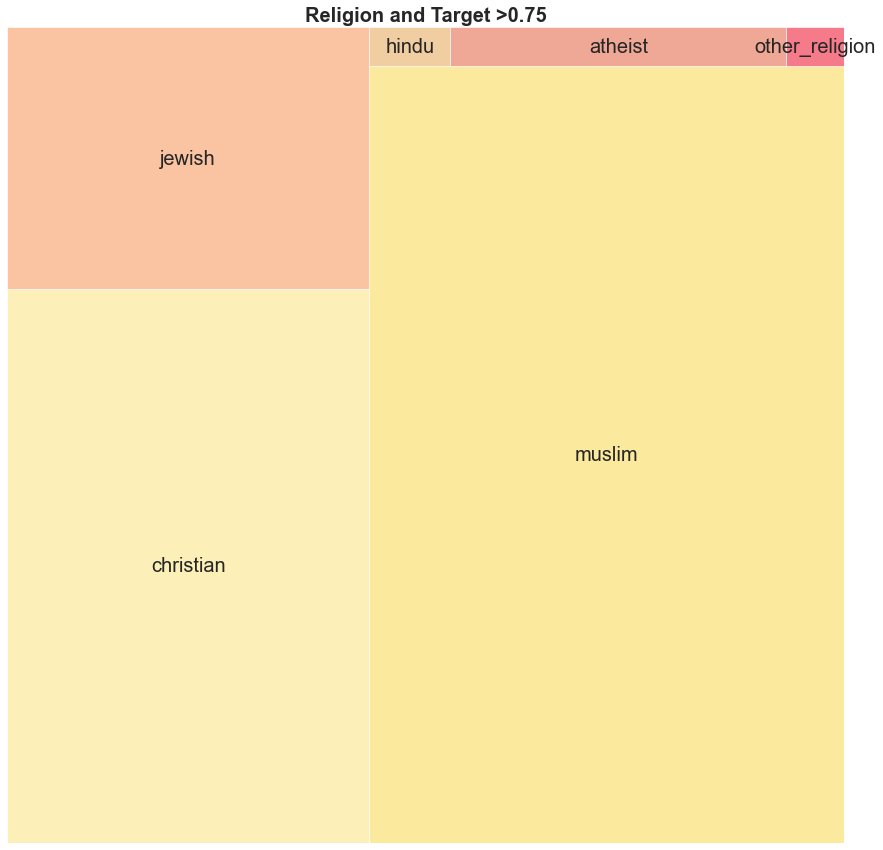

In [40]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= religion_data_target["values"].values# proportions of the categories
label=religion_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Religion and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [41]:
label= ["black", "white", "asian","latino","other_race_or_ethnicity"]
values_insult =[]
values_threat =[]
values_obscene =[]
values_target =[]
label_insult =[]
label_threat =[]
label_obscene =[]
label_target =[]
for curr_race in label:
    counter1 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['insult'] > 0.75)]["comment_text"].count()
    counter2 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['threat'] > 0.75)]["comment_text"].count()
    counter3 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['obscene'] > 0.75)]["comment_text"].count()
    counter4 = toxic_train.loc[(toxic_train[curr_race] > 0.5) & (toxic_train['target'] > 0.75)]["comment_text"].count()
    if counter1 >0:
        values_insult.append(counter1)
        label_insult.append(curr_race)
    if counter2>0:
        values_threat.append(counter2)
        label_threat.append(curr_race)
    if counter3>0:
        values_obscene.append(counter3)
        label_obscene.append(curr_race)
    if counter4>0:
        values_target.append(counter4)
        label_target.append(curr_race)
race_data_insult = pd.DataFrame({"label":label_insult, "values":values_insult})
race_data_threat = pd.DataFrame({"label":label_threat, "values":values_threat})
race_data_obscene = pd.DataFrame({"label":label_obscene, "values":values_obscene})
race_data_target = pd.DataFrame({"label":label_target, "values":values_target})
print(race_data_insult)
print(race_data_threat)
print(race_data_obscene)
print(race_data_target)

                     label  values
0                    black     249
1                    white     450
2                    asian      36
3                   latino      22
4  other_race_or_ethnicity       5
   label  values
0  black       4
1  white      13
2  asian       1
    label  values
0   black      19
1   white      23
2   asian       3
3  latino       2
                     label  values
0                    black     784
1                    white    1083
2                    asian      78
3                   latino      43
4  other_race_or_ethnicity       7


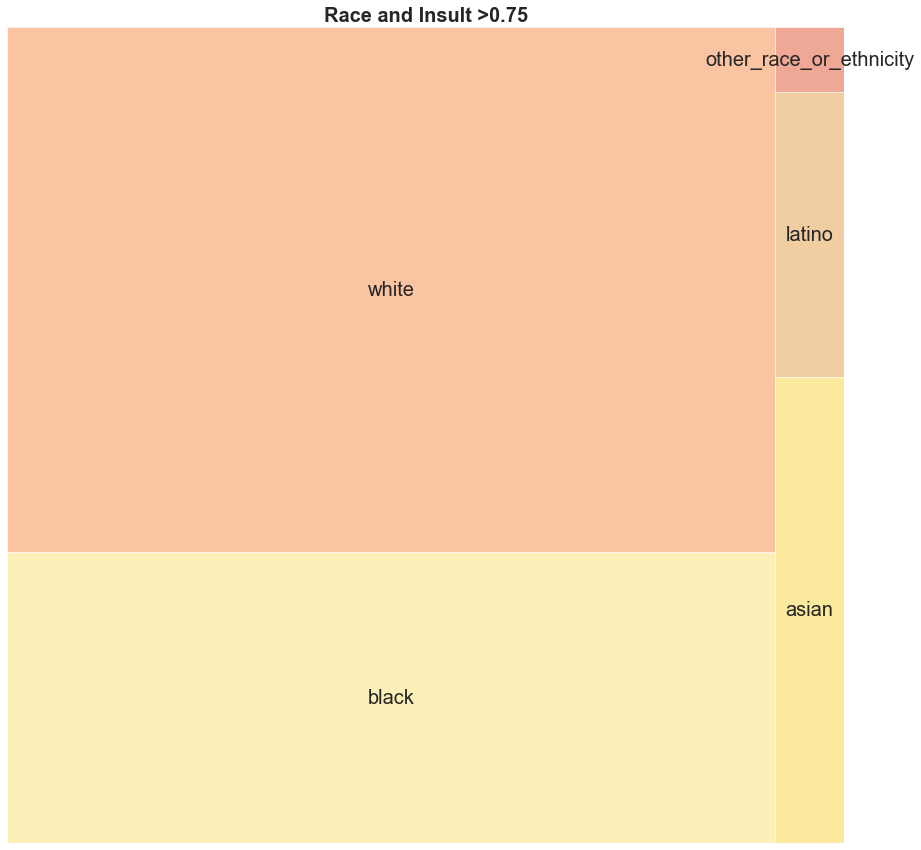

In [42]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_insult["values"].values# proportions of the categories
label=race_data_insult["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Insult >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

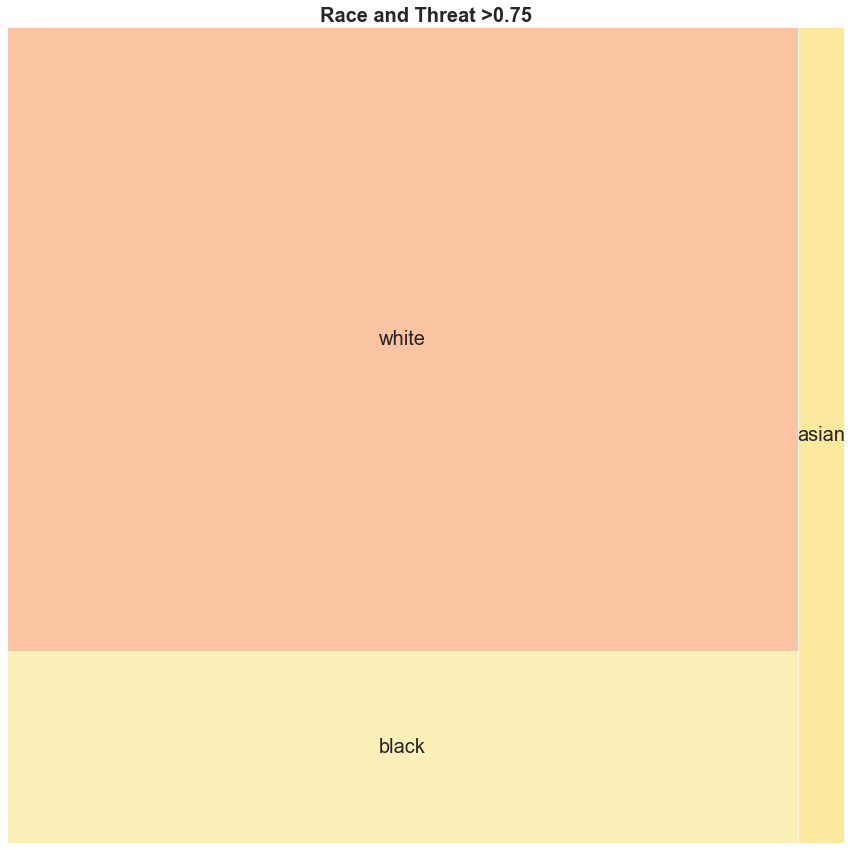

In [44]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_threat["values"].values# proportions of the categories
label=race_data_threat["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Threat >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

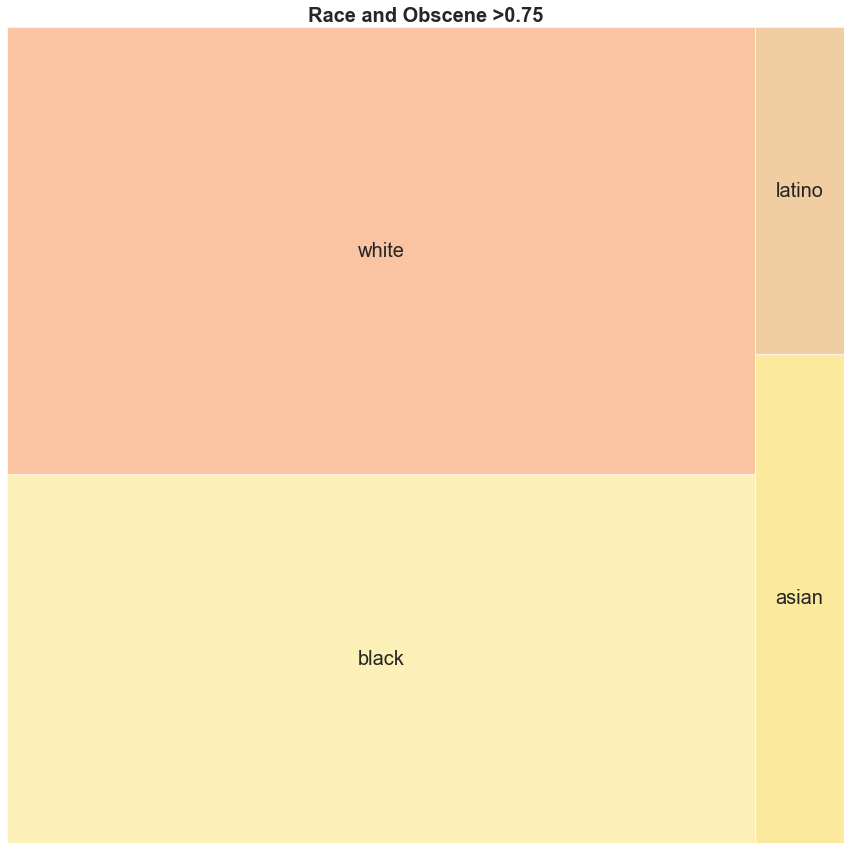

In [45]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_obscene["values"].values# proportions of the categories
label=race_data_obscene["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Obscene >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

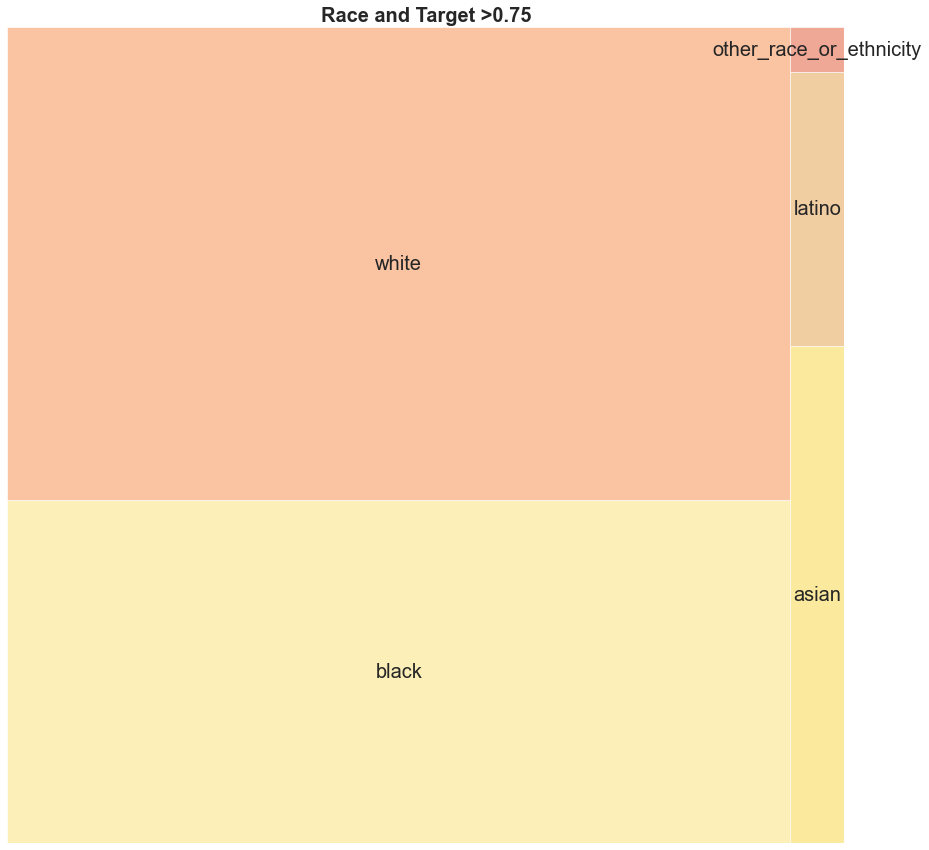

In [46]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= race_data_target["values"].values# proportions of the categories
label=race_data_target["label"]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors, text_kwargs={'fontsize':20})


plt.rcParams["figure.figsize"] = [15,15]
plt.title("Race and Target >0.75",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()